Shyam Kumar Ray Yadav (18449154) 

Sonu Kumar (15651099)


Ahmad Raza Khawaja (25848862)

# Problem sheet 3

## Exercise 3.1: central limit theorem.

Let $x$ be a random variable that equals $−1$ with probability $0.5$ and $+1$ with probability $0.5$. For
$i$ $\in$ $N$, let $x_i$ be independent and identically distributed copies of $x$. For $N$ $\in$ $N$, introduce new random variables via $X_{N=1}:= \frac{1}{\sqrt{N}}\sum_{i = 1}^{N}x_i$. In particular, $X_{N = 1}$ will have the same distribution as $x$. $X_{N=2}$ will take on values $[-\sqrt{2}, 0, \sqrt{2}]$ with probabilities $[0.25, 0.5, 0.25]$ respectively. By the central limit theorem, as $N \rightarrow \infty$, the distribution of $X_N$ will approach that of a standard normal distribution. We will study this visually in this exercise.

1. Using the pseudo random number generator of numpy, implement a function that for given $M, N, \in N$, draws $M$ independent samples of $X_N$.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm
import seaborn as sns

In [186]:
#function for drawing independents samples of X_N
def draw_samples(M, N):
    #Generate 2D NumPy array of M rows and N columns from the sample set of [-1,1]
    random_numbers = np.random.choice([-1, 1], size = (M, N))
    # print(random_numbers)

    #Compute the sum along the columns (X_n) for each rows and normalize by sqrt(N) as given in formula.
    X_N = np.sum(random_numbers, axis = 1)/ np.sqrt(N)
    return X_N
    
# print(draw_samples(10,7))
    

2. Using the density estimation methods from the lecture, visualize the distributions of $X_N$ for $N \in \{1, 3, 10, 30, 100\}$, by applying some density estimation method to samples drawn from $X_N$ and verify visually that the central limit theorem holds.

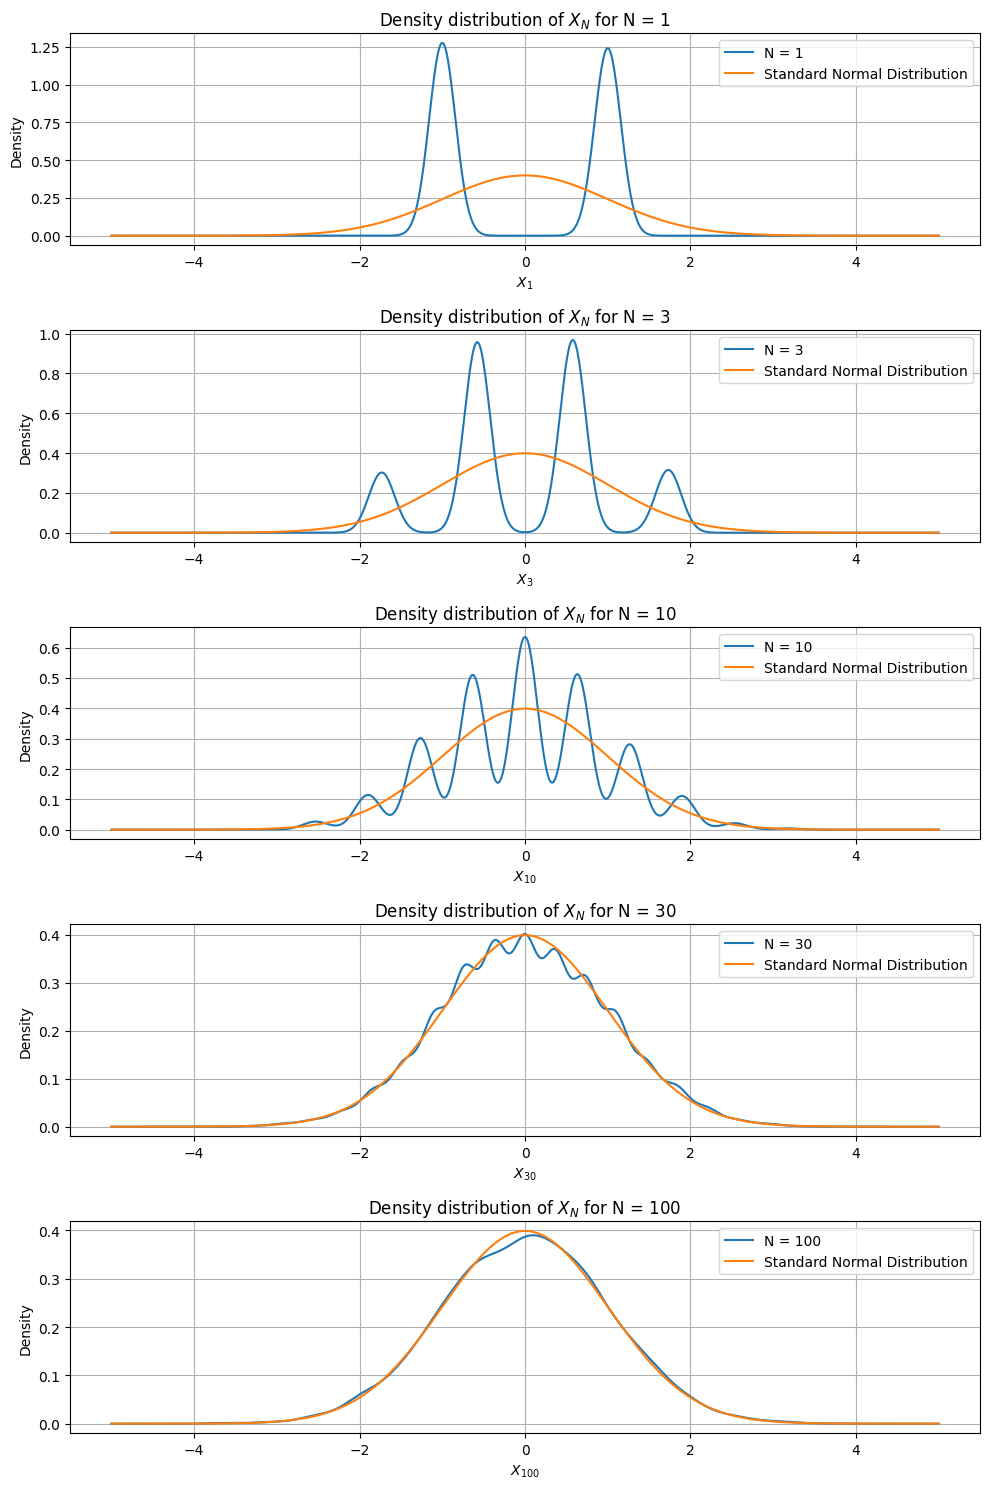

In [187]:
N_values = [1, 3, 10, 30, 100] #Values of N
M = 10000 #No of samples. 

fig, axs = plt.subplots(len(N_values), figsize = (10,15))

for i, n in enumerate(N_values):
    #draw sample of X_N for individual n_values.
    samples = draw_samples(M, n)

    #Applying density estimation using Gaussian Kernel Density Estimation Method (KDE) due to finite data.
    kde = gaussian_kde(samples)

    #Evaluate KDE on X-grid for each data points
    x_grid = np.linspace(-5, 5, 1000) #Creating a grid of 1000 evenly spaced points between -5 & 5, which
        #is used to represent the range of values over which the density estimation will be calculated.
    density_estimation = kde(x_grid)

    #Plot the density estimation 
    axs[i].plot(x_grid, density_estimation, label = f'N = {n}')
    axs[i].plot(x_grid, norm.pdf(x_grid), label = f'Standard Normal Distribution')
    axs[i].set_title(f'Density distribution of ${{X_N}}$ for N = {n}')
    axs[i].set_xlabel(f'$X_{{{n}}}$')
    axs[i].set_ylabel('Density')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## Exercise 3.2: temperature data.

We use more data from the Deutscher Wetterdienst (DWD). The original data is available at the given website in the assignment pdf, but all data required for the exercise is once more provided in the zip file of the problem sheet.


1. The file $temperature\_data\_processed.csv$ contains condensed information on temperature measurements at $80$ selected measurement stations in Germany from $1781$ to $2024$. The column $stationid$ indicates the id of the corresponding station, date contains the date of the measurement in the format $YYYYMMDD$, $time$ contains the time in the format $HH$, and $temp$ contains the temperature measured at the given station at the given date and time in degree Celsius according to some standardized protocol (that has however slightly changed over the years). Import this into Python as a dataframe. Parse the $date$ column to add explicit $year$, $month$, and $day$ columns. Temperature values of $-999$ indicate missing data. Remove these rows from the dataframe.

In [188]:
df = pd.read_csv('temperature_data_processed.csv')

print(df.head())
rows, columns = df.shape
print("Num of rows:", rows)
print("Num of columns:", columns)
df

   stationid  temp      date  time
0          3  -5.6  18910101     7
1          3  -0.7  18910101    14
2          3  -4.0  18910101    21
3          3  -5.2  18910102     7
4          3  -1.0  18910102    14
Num of rows: 6972481
Num of columns: 4


,stationid,temp,date,time
0,3,-5.6,18910101,7
1,3,-0.7,18910101,14
2,3,-4.0,18910101,21
3,3,-5.2,18910102,7
4,3,-1.0,18910102,14
...,...,...,...,...
6972476,15526,7.4,19351230,14
6972477,15526,7.0,19351230,20
6972478,15526,7.0,19351231,8
6972479,15526,8.2,19351231,14


In [189]:
# df = df[df['temp']!=-999]

In [190]:
#Removing the missing values represented by -999
df.replace(-999, pd.NA, inplace = True)
df.dropna()
df.isnull().sum()

stationid        0
temp         15812
date             0
time             0
dtype: int64

In [191]:
# #Parsing the date column in year, month, and day format
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d') #making data column in date format
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,stationid,temp,date,time,year,month,day
0,3,-5.6,1891-01-01,7,1891,1,1
1,3,-0.7,1891-01-01,14,1891,1,1
2,3,-4.0,1891-01-01,21,1891,1,1
3,3,-5.2,1891-01-02,7,1891,1,2
4,3,-1.0,1891-01-02,14,1891,1,2
...,...,...,...,...,...,...,...
6972476,15526,7.4,1935-12-30,14,1935,12,30
6972477,15526,7.0,1935-12-30,20,1935,12,30
6972478,15526,7.0,1935-12-31,8,1935,12,31
6972479,15526,8.2,1935-12-31,14,1935,12,31


2. Examine and visualize how many stations contributed measurements in each year covered in the dataset.


In [192]:
station_per_year = df.groupby('year')['stationid'].nunique()
station_per_year

year
1781     1
1782     1
1783     1
1784     1
1785     1
        ..
2020    73
2021    73
2022    73
2023    72
2024    72
Name: stationid, Length: 238, dtype: int64

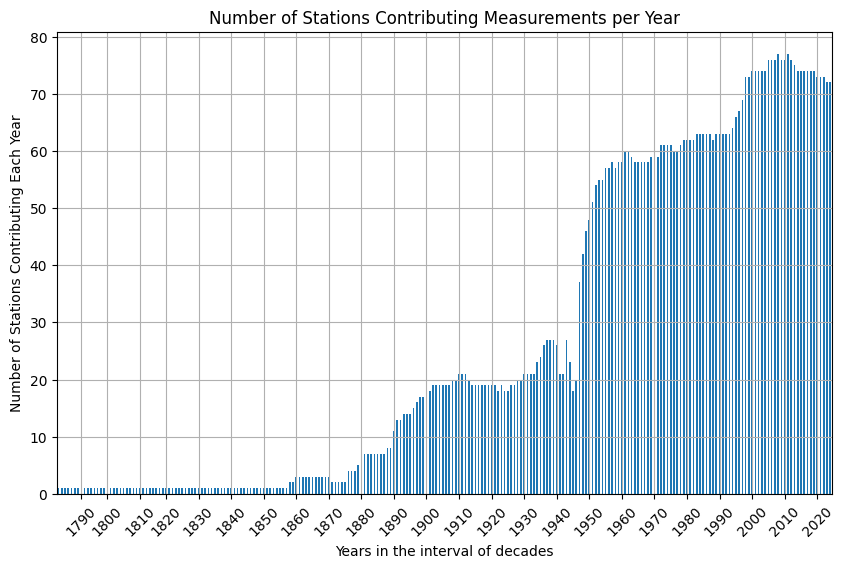

In [193]:
# Plotting the number of unique stations per year
plt.figure(figsize=(10, 6))
station_per_year.plot(kind='bar')
plt.title('Number of Stations Contributing Measurements per Year')
plt.xlabel('Years in the interval of decades')
plt.ylabel('Number of Stations Contributing Each Year')

#Get the years from the index of the years from the data frame.
years = station_per_year.index

#Initialize en empty list to store indices of ticks, and corresponding labels.
ticks = []
labels = []

for i, years in enumerate(years):
    if years % 10 == 0:
        ticks.append(i)
        labels.append(years)

plt.xticks(ticks = ticks, labels = labels, rotation =45)


plt.grid()
plt.show()



3. Identify the stations that were active both in 1900 and 2020. We will refer to these as reference stations.

In [194]:
#Filtering dataFrame corresponding to years 1900 and 2020.
stations_1900 = df[df['year'] ==1900]['stationid'].unique()
stations_2020 = df[df['year'] == 2020]['stationid'].unique()
print(stations_1900, stations_2020)

[    3   402   691   722   880  1358  1684  1757  2290  2522  2532  3126
  3631  3987  4104  4625  5792 15526] [  102   164   183   232   282   403   433   691   722   880   891   954
  1048  1078  1228  1262  1270  1346  1358  1420  1468  1504  1612  1639
  1684  1757  1766  1832  1975  2014  2115  2261  2290  2483  2559  2564
  2667  2712  2812  2932  2961  3015  3032  3126  3196  3231  3631  3660
  3668  3730  3761  3987  4104  4177  4271  4336  4466  4625  4887  4911
  4931  5100  5371  5397  5516  5705  5792  5839  5856  5871  5906  7341
 15000]


In [195]:
#Identifying the stations that were active both in 1900 and 2020.
reference_stations = set(stations_1900).intersection(stations_2020)
print("Reference Stations: ",reference_stations)

Reference Stations:  {5792, 4104, 1358, 3631, 880, 4625, 722, 691, 1684, 2290, 3126, 3987, 1757}


4. Filter the data for the intersection (logical and) of the following conditions: The station must be a reference station, the year must be in the interval [1900, 2020], the month must be contained in {June, July, August}, and the time must be either 12 or 14. Group the filtered data by year.


In [196]:
#Filtering the given conditions.
filtered_data = df[ (df['stationid'].isin(reference_stations)) &
                (df['year'].between(1900, 2020)) &
                (df['month'].isin([6,7,8])) &
                (df['time'].isin([12,14]))]
filtered_data

,stationid,temp,date,time,year,month,day
808036,691,18.7,1900-06-01,14,1900,6,1
808039,691,22.1,1900-06-02,14,1900,6,2
808042,691,26.0,1900-06-03,14,1900,6,3
808045,691,28.2,1900-06-04,14,1900,6,4
808048,691,24.3,1900-06-05,14,1900,6,5
...,...,...,...,...,...,...,...
6709831,5792,4.9,2020-08-27,12,2020,8,27
6709834,5792,6.2,2020-08-28,12,2020,8,28
6709837,5792,2.5,2020-08-29,12,2020,8,29
6709840,5792,2.7,2020-08-30,12,2020,8,30


In [197]:
#Now grouping the data by year.
grouped_filtered_data = filtered_data.groupby('year')
# for year, group in grouped_filtered_data:
#     print(group)
    

5. Now find some way to visualize the distribution of temperatures measured in each year. This part has not been covered in the lecture explicitly (and the methods presented next week might be unsuitable). You need to come up with your own approach.

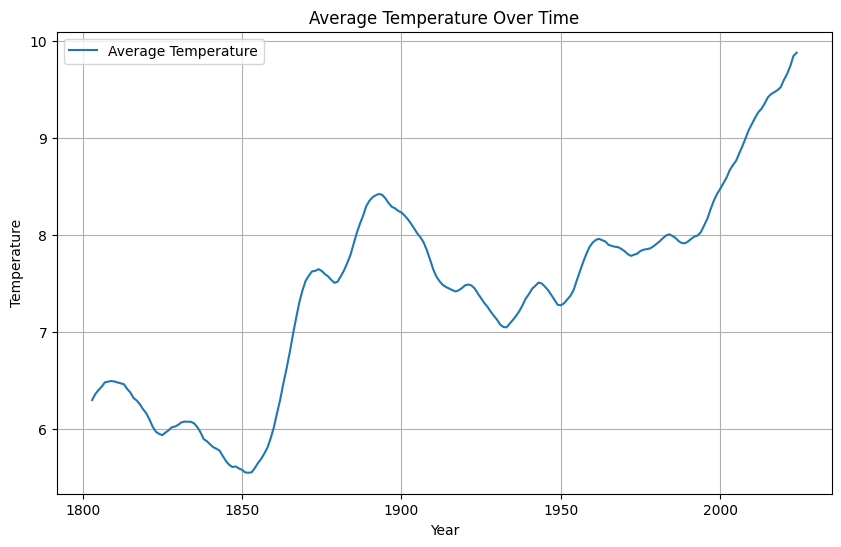

In [204]:
 # Aggregate temperatures by year
aggregated_temp_yearly = df.groupby('year')['temp'].mean().reset_index()

#applyging rolling window of size 10 to 'temp' column and calculating mean back within that window.
aggregated_data['temp'] = aggregated_data['temp'].rolling(window=10).mean() #smoothen the fluctuations and reduce noise

plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['year'], aggregated_data['temp'], label='Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()
